In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score
import numpy as np
import os


In [19]:
# Define the CNN architecture
cnn = Sequential()

In [20]:
# Convolutional Block 1
cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

# Convolutional Block 2
cnn.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.3))

# Convolutional Block 3
cnn.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.4))

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Fully Connected Layers
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

cnn.add(Dense(64, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.4))

cnn.add(Dense(26, activation='softmax'))

In [22]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
cnn.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [23]:
# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.4,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [24]:
# Data generators
train_generator = datagen.flow_from_directory(
    r"C:\Users\USER\OneDrive\Desktop\malware analysic\malimg_dataset\malimg_paper_dataset_imgs",
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 7877 images belonging to 26 classes.


In [25]:
validation_generator = datagen.flow_from_directory(
    r"C:\Users\USER\OneDrive\Desktop\malware analysic\malimg_dataset\malimg_paper_dataset_imgs",
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Ensure data order remains consistent for evaluation
)

Found 1956 images belonging to 26 classes.


In [26]:
# Callbacks for better training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

In [27]:
# Train model and capture history
history = cnn.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator),
    epochs=5,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/5


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (123142144 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 23/247 ━━━━━━━━━━━━━━━━━━━━ 59s 267ms/step - accuracy: 0.0653 - loss: 3.8748 

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (130531328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 30/247 ━━━━━━━━━━━━━━━━━━━━ 1:04 297ms/step - accuracy: 0.0810 - loss: 3.7799

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (163217408 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 31/247 ━━━━━━━━━━━━━━━━━━━━ 1:08 319ms/step - accuracy: 0.0834 - loss: 3.7670

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (136445952 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 49/247 ━━━━━━━━━━━━━━━━━━━━ 1:04 327ms/step - accuracy: 0.1192 - loss: 3.5780

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (154206208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 54/247 ━━━━━━━━━━━━━━━━━━━━ 1:05 340ms/step - accuracy: 0.1273 - loss: 3.5356

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (129056768 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 74/247 ━━━━━━━━━━━━━━━━━━━━ 56s 328ms/step - accuracy: 0.1538 - loss: 3.3984

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (113295360 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


185/247 ━━━━━━━━━━━━━━━━━━━━ 18s 299ms/step - accuracy: 0.2415 - loss: 2.9408

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (119914496 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


204/247 ━━━━━━━━━━━━━━━━━━━━ 12s 299ms/step - accuracy: 0.2515 - loss: 2.8874

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (143212544 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


224/247 ━━━━━━━━━━━━━━━━━━━━ 6s 299ms/step - accuracy: 0.2610 - loss: 2.8363

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (146620416 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.2707 - loss: 2.7836

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (149094400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (114212864 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (157974528 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


247/247 ━━━━━━━━━━━━━━━━━━━━ 87s 340ms/step - accuracy: 0.2711 - loss: 2.7814 - val_accuracy: 0.0123 - val_loss: 27.0488 - learning_rate: 0.0010
Epoch 2/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/5


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\callback_list.py:151: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


247/247 ━━━━━━━━━━━━━━━━━━━━ 84s 339ms/step - accuracy: 0.5024 - loss: 1.5884 - val_accuracy: 0.0378 - val_loss: 12.5451 - learning_rate: 0.0010
Epoch 4/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 96us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 84s 340ms/step - accuracy: 0.5725 - loss: 1.3627 - val_accuracy: 0.4540 - val_loss: 5.1001 - learning_rate: 0.0010


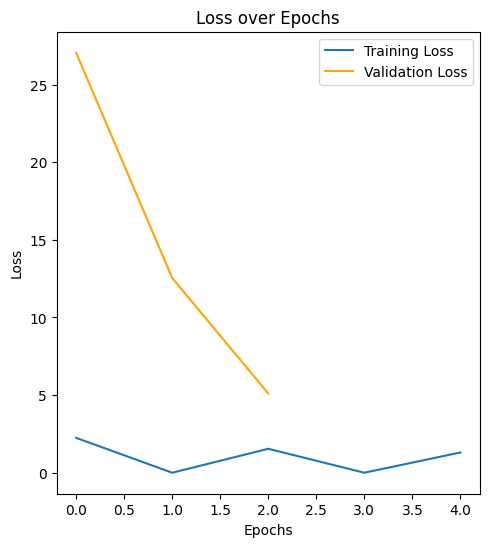

In [28]:
# Plot loss and accuracy
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

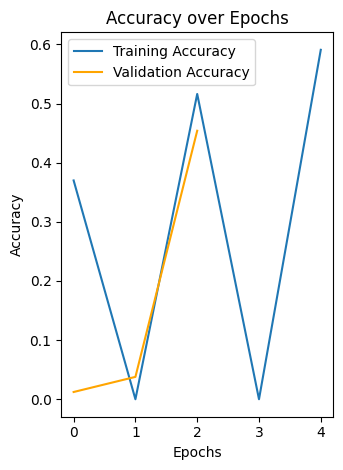

In [29]:
# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
# Evaluate the model on the validation set
true_labels = validation_generator.classes
predictions = cnn.predict(validation_generator, steps=len(validation_generator), verbose=1)
predicted_labels = np.argmax(predictions, axis=1)

62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step


In [31]:
# Get class labels
class_labels = list(validation_generator.class_indices.keys())

In [32]:
# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_labels))

Classification Report:
                precision    recall  f1-score   support

     Adialer.C       0.68      0.79      0.73        24
     Agent.FYI       0.79      0.48      0.59        23
     Allaple.A       0.59      0.59      0.59       589
     Allaple.L       0.88      0.26      0.41       318
 Alueron.gen!J       0.15      0.49      0.23        39
     Autorun.K       0.00      0.00      0.00        21
        Benign       0.44      0.26      0.32        98
       C2LOP.P       0.50      0.10      0.17        29
   C2LOP.gen!g       0.17      0.25      0.20        40
Dialplatform.B       0.04      0.34      0.07        35
     Dontovo.A       0.97      0.97      0.97        32
      Fakerean       0.90      0.49      0.63        76
 Instantaccess       0.38      0.26      0.31        86
    Lolyda.AA1       0.58      0.26      0.36        42
    Lolyda.AA2       0.46      0.33      0.39        36
    Lolyda.AA3       1.00      0.38      0.55        24
     Lolyda.AT       0.2

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [33]:
# Calculate and display F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"Weighted F1 Score: {f1:.4f}")

Weighted F1 Score: 0.4806


In [34]:
# Save the trained model to a .keras file
save_path = "malware_classification_model.keras"
cnn.save(save_path)

print(f"Model saved to {os.path.abspath(save_path)}")

Model saved to C:\Users\USER\OneDrive\Desktop\John\malware_classification_model.keras
